# Survey of date and place coordinates
The code in this notebook explores the cultural properties in ArCo, the italian cultural heritage knowledge graph, for which an execution date is specified. 

In [1]:
import pandas as pd
import altair as alt
import numpy as np

In [2]:
import sys
import os
import importlib
sys.path.append(os.path.abspath('queries'))

from queries import *

In [3]:


# make changes to example.py file

importlib.reload(rijksmuseum)

<module 'queries.rijksmuseum' from 'C:\\Users\\baroncis\\Documents\\PythonScripts\\data-exploration\\queries\\rijksmuseum.py'>

In [4]:
dir(rijksmuseum)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'local_endpoint',
 'os',
 'q_rk_art_aligned_tot',
 'q_rk_author_aligned_tot',
 'q_rk_author_date_tot',
 'q_rk_author_place_tot',
 'q_rk_author_tot',
 'q_rk_date_place_tot',
 'q_rk_date_tot',
 'q_rk_place_tot',
 'q_rk_tot',
 'query_wrapper_tot',
 'sparql_query_setting',
 'sys']

In [5]:
headers = ['Dataset', 'Artworks', 'With date', 'With place', 'With date and place', 'With author', 'With author with date', 'With author with place', 'Aligned to Wikidata', 'With author aligned to ULAN or Wikidata']
headers_prop = headers.copy()
headers_prop.remove('Artworks')
print(headers)
print(headers_prop)
df_main = pd.DataFrame(columns=headers)
df_prop = pd.DataFrame(columns=headers_prop)

['Dataset', 'Artworks', 'With date', 'With place', 'With date and place', 'With author', 'With author with date', 'With author with place', 'Aligned to Wikidata', 'With author aligned to ULAN or Wikidata']
['Dataset', 'With date', 'With place', 'With date and place', 'With author', 'With author with date', 'With author with place', 'Aligned to Wikidata', 'With author aligned to ULAN or Wikidata']


## ArCO
The italian Cultural Heritage Knowledge Graph

In [6]:
arco_list = ["Arco"]
arco_prop = ["Arco"]

Total number of artworks (arco:HistoricOrArtisticProperty)

In [7]:
arco_art_tot = q_arco_tot()
print("Total: ", arco_art_tot)
arco_list.append(int(arco_art_tot))
print(arco_list)

Total:  2184247
['Arco', 2184247]


Number of artworks having a date specified

In [8]:
arco_date_tot = q_arco_date_tot()
arco_prop_date = pprint_prop(arco_date_tot, arco_art_tot, arco_list, arco_prop)

total:  2142257
percentage of the total of artworks:  98.08
['Arco', 2184247, 2142257]
['Arco', 98.08]


Number of artworks having a place of creation specified

In [9]:
arco_place_tot = q_arco_place_tot()
arco_prop_place = pprint_prop(arco_place_tot, arco_art_tot, arco_list, arco_prop)

total:  984
percentage of the total of artworks:  0.05
['Arco', 2184247, 2142257, 984]
['Arco', 98.08, 0.05]


Number of artworks haivng both a date and place of creation specified

In [10]:
arco_date_place_tot = q_arco_date_place_tot()
arco_prop_date_place = pprint_prop(arco_date_place_tot, arco_art_tot, arco_list, arco_prop)
# arco_overview.append(["With date and place", int(arco_date_place_tot)])

total:  984
percentage of the total of artworks:  0.05
['Arco', 2184247, 2142257, 984, 984]
['Arco', 98.08, 0.05, 0.05]


### Author details

Number of artworks having an author specified

In [11]:
arco_author_tot = q_arco_author_tot()
arco_prop_auth = pprint_prop(arco_author_tot, arco_art_tot, arco_list, arco_prop)
#print("total: ", arco_author_tot)
#arco_overview.append(["With author", int(arco_author_tot)])
#arco_prop_auth = round((int(arco_author_tot)/int(arco_art_tot))*100, 2)
#print("percentage of the total of artworks: ", arco_prop_auth)

total:  524173
percentage of the total of artworks:  24.0
['Arco', 2184247, 2142257, 984, 984, 524173]
['Arco', 98.08, 0.05, 0.05, 24.0]


Number of artworks with an author with at least a date (birth or death)

In [12]:
arco_author_date = q_arco_author_date_tot()
arco_prop_auth_date = pprint_prop(arco_author_date, arco_art_tot, arco_list, arco_prop)

total:  257900
percentage of the total of artworks:  11.81
['Arco', 2184247, 2142257, 984, 984, 524173, 257900]
['Arco', 98.08, 0.05, 0.05, 24.0, 11.81]


Number of artworks with an author with at least a place (birth or death)

In [13]:
arco_author_place = q_arco_author_place_tot()
arco_prop_auth_place = pprint_prop(arco_author_place, arco_art_tot, arco_list, arco_prop)

total:  259153
percentage of the total of artworks:  11.86
['Arco', 2184247, 2142257, 984, 984, 524173, 257900, 259153]
['Arco', 98.08, 0.05, 0.05, 24.0, 11.81, 11.86]


Number of artworks having an author aligned with Wikidata

In [14]:
arco_author_wd = q_arco_author_wikidata_tot()
arco_prop_auth_wd = pprint_prop(arco_author_wd, arco_art_tot, arco_list, arco_prop)

total:  148792
percentage of the total of artworks:  6.81
['Arco', 2184247, 2142257, 984, 984, 524173, 257900, 259153, 148792]
['Arco', 98.08, 0.05, 0.05, 24.0, 11.81, 11.86, 6.81]


Number of artworks having an author alighed with ULAN

In [15]:
arco_author_ulan = q_arco_author_ulan_tot()
arco_prop_auth_ulan = pprint_prop(arco_author_ulan, arco_art_tot, arco_list, arco_prop)

total:  0
percentage of the total of artworks:  0.0
['Arco', 2184247, 2142257, 984, 984, 524173, 257900, 259153, 148792, 0]
['Arco', 98.08, 0.05, 0.05, 24.0, 11.81, 11.86, 6.81, 0.0]


In [16]:
# add arco details to the main dataframe
df_main.loc[len(df_main)] = arco_list
#df_main = df_main.append(pd.Series(arco_list, index=column_headers), ignore_index=True)
df_prop.loc[len(df_prop)] = arco_prop

arco_df = pd.DataFrame(np.array(arco_overview),
                       columns=['Name', 'Total'])
arco_df["Total"] = pd.to_numeric(arco_df["Total"])

## Zeri

In [17]:
#zeri_overview = []
zeri_list = ['Zeri']
zeri_prop = ['Zeri']

In [18]:
zeri_art_tot = q_zeri_tot()
print(zeri_art_tot)
zeri_list.append(zeri_art_tot)
#zeri_overview.append(["Artworks", int(zeri_art_tot)])

# date
print("date")
zeri_date = q_zeri_date_tot()
zeri_date_prop = pprint_prop(zeri_date, zeri_art_tot, zeri_list, zeri_prop)

#place 
print("place")
zeri_place = q_zeri_place_tot()
zeri_date_prop = pprint_prop(zeri_place, zeri_art_tot, zeri_list, zeri_prop)

# date and place
print("date and place")
zeri_date_place = q_zeri_date_place_tot()
zeri_date_place_prop = pprint_prop(zeri_date_place, zeri_art_tot, zeri_list, zeri_prop)

20082
date
total:  20010
percentage of the total of artworks:  99.64
['Zeri', 20082, 20010]
['Zeri', 99.64]
place
total:  0
percentage of the total of artworks:  0.0
['Zeri', 20082, 20010, 0]
['Zeri', 99.64, 0.0]
date and place
total:  0
percentage of the total of artworks:  0.0
['Zeri', 20082, 20010, 0, 0]
['Zeri', 99.64, 0.0, 0.0]


zeri_date = q_zeri_date_tot()
zeri_date_prop = pprint_prop(zeri_date, zeri_art_tot, zeri_list, zeri_prop)
#print(zeri_date)
#zeri_overview.append(["with a date", int(zeri_date)])

In [19]:
#zeri_place = q_zeri_place_tot()
#print(zeri_place)
#zeri_overview.append(["with a place", int(zeri_place)])

### Author details

In [20]:
## authors
print("with author")
zeri_auth = q_zeri_author_tot()
zeri_auth_prop = pprint_prop(zeri_auth, zeri_art_tot, zeri_list, zeri_prop)

## authors with date
print("authors with date")
zeri_auth_date = q_zeri_author_date_tot()
zeri_auth_date_prop = pprint_prop(zeri_auth_date, zeri_art_tot, zeri_list, zeri_prop)

## authors with place
print("authors with place")
zeri_auth_place = q_zeri_author_place_tot()
zeri_auth_place_prop = pprint_prop(zeri_auth_place, zeri_art_tot, zeri_list, zeri_prop)

with author
total:  19061
percentage of the total of artworks:  94.92
['Zeri', 20082, 20010, 0, 0, 19061]
['Zeri', 99.64, 0.0, 0.0, 94.92]
authors with date
total:  0
percentage of the total of artworks:  0.0
['Zeri', 20082, 20010, 0, 0, 19061, 0]
['Zeri', 99.64, 0.0, 0.0, 94.92, 0.0]
authors with place
total:  0
percentage of the total of artworks:  0.0
['Zeri', 20082, 20010, 0, 0, 19061, 0, 0]
['Zeri', 99.64, 0.0, 0.0, 94.92, 0.0, 0.0]


### Authors aligned

In [21]:
zeri_author_ulan = q_zeri_author_ulan_tot()

In [22]:
# wd
zeri_author_wd = q_zeri_author_wikidata_tot()
zeri_prop_auth_wd = pprint_prop(zeri_author_wd, zeri_art_tot, zeri_list, zeri_prop)

#ulan
zeri_author_ulan = q_zeri_author_ulan_tot()
zeri_prop_auth_ulan = pprint_prop(zeri_author_ulan, zeri_art_tot, zeri_list, zeri_prop)

total:  0
percentage of the total of artworks:  0.0
['Zeri', 20082, 20010, 0, 0, 19061, 0, 0, 0]
['Zeri', 99.64, 0.0, 0.0, 94.92, 0.0, 0.0, 0.0]
total:  0
percentage of the total of artworks:  0.0
['Zeri', 20082, 20010, 0, 0, 19061, 0, 0, 0, 0]
['Zeri', 99.64, 0.0, 0.0, 94.92, 0.0, 0.0, 0.0, 0.0]


### Add results to the main dataframe

In [23]:
# add zeri details to the main dataframe
df_main.loc[len(df_main)] = zeri_list
#df_main = df_main.append(pd.Series(zeri_list, index=column_headers), ignore_index=True)
df_prop.loc[len(df_prop)] = zeri_prop

## Europeana

In [24]:
eu_list = ['Europeana']
eu_prop = ['Europeana']

eu_art_tot = q_eu_tot()
print(eu_art_tot)
eu_list.append(eu_art_tot)

369853


In [25]:

# date
print("date")
eu_date = q_eu_date_tot()
eu_date_prop = pprint_prop(eu_date, eu_art_tot, eu_list, eu_prop)

#place 
print("place")
eu_place = q_eu_place_tot()
eu_date_prop = pprint_prop(eu_place, eu_art_tot, eu_list, eu_prop)

# date and place
print("date and place")
eu_date_place = q_eu_date_place_tot()
eu_date_place_prop = pprint_prop(eu_date_place, eu_art_tot, eu_list, eu_prop)

date
total:  306445
percentage of the total of artworks:  82.86
['Europeana', 369853, 306445]
['Europeana', 82.86]
place
total:  175784
percentage of the total of artworks:  47.53
['Europeana', 369853, 306445, 175784]
['Europeana', 82.86, 47.53]
date and place
total:  152908
percentage of the total of artworks:  41.34
['Europeana', 369853, 306445, 175784, 152908]
['Europeana', 82.86, 47.53, 41.34]


### Author details

In [26]:
## authors
print("with author")
eu_auth = q_eu_author_tot()
eu_auth_prop = pprint_prop(eu_auth, eu_art_tot, eu_list, eu_prop)

## authors with date
print("authors with date")
eu_auth_date = q_eu_author_date_tot()
eu_auth_date_prop = pprint_prop(eu_auth_date, eu_art_tot, eu_list, eu_prop)

## authors with place
print("authors with place")
eu_auth_place = q_eu_author_place_tot()
eu_auth_place_prop = pprint_prop(eu_auth_place, eu_art_tot, eu_list, eu_prop)

with author
total:  112330
percentage of the total of artworks:  30.37
['Europeana', 369853, 306445, 175784, 152908, 112330]
['Europeana', 82.86, 47.53, 41.34, 30.37]
authors with date
total:  68532
percentage of the total of artworks:  18.53
['Europeana', 369853, 306445, 175784, 152908, 112330, 68532]
['Europeana', 82.86, 47.53, 41.34, 30.37, 18.53]
authors with place
total:  2
percentage of the total of artworks:  0.0
['Europeana', 369853, 306445, 175784, 152908, 112330, 68532, 2]
['Europeana', 82.86, 47.53, 41.34, 30.37, 18.53, 0.0]


### Alignments

In [27]:
importlib.reload(europeana)
# wd
print("artworks with authors aligned to wikidata")
eu_author_wd = q_eu_author_wikidata_tot()
eu_prop_auth_wd = pprint_prop(eu_author_wd, eu_art_tot, eu_list, eu_prop)

#ulan
print("artworks with authors aligned to ulan")
eu_author_ulan = q_eu_author_ulan_tot()
eu_prop_auth_ulan = pprint_prop(eu_author_ulan, eu_art_tot, eu_list, eu_prop)

artworks with authors aligned to wikidata
total:  127
percentage of the total of artworks:  0.03
['Europeana', 369853, 306445, 175784, 152908, 112330, 68532, 2, 127]
['Europeana', 82.86, 47.53, 41.34, 30.37, 18.53, 0.0, 0.03]
artworks with authors aligned to ulan
total:  118
percentage of the total of artworks:  0.03
['Europeana', 369853, 306445, 175784, 152908, 112330, 68532, 2, 127, 118]
['Europeana', 82.86, 47.53, 41.34, 30.37, 18.53, 0.0, 0.03, 0.03]


In [28]:
# add  details to the main dataframe
df_main.loc[len(df_main)] = eu_list
#df_main = df_main.append(pd.Series(_list, index=column_headers), ignore_index=True)
df_prop.loc[len(df_prop)] = eu_prop

## DBpedia

In [29]:
db_list = ['DBpedia']
db_prop = ['DBpedia']

db_art_tot = q_db_tot()
print(db_art_tot)
db_list.append(db_art_tot)

12446


In [30]:

# date
print("date")
db_date = q_db_date_tot()
db_date_prop = pprint_prop(db_date, db_art_tot, db_list, db_prop)

#place 
print("place")
db_place = q_db_place_tot()
db_date_prop = pprint_prop(db_place, db_art_tot, db_list, db_prop)

# date and place
print("date and place")
db_date_place = q_db_date_place_tot()
db_date_place_prop = pprint_prop(db_date_place, db_art_tot, db_list, db_prop)

date
total:  248
percentage of the total of artworks:  1.99
['DBpedia', 12446, 248]
['DBpedia', 1.99]
place
total:  0
percentage of the total of artworks:  0.0
['DBpedia', 12446, 248, 0]
['DBpedia', 1.99, 0.0]
date and place
total:  0
percentage of the total of artworks:  0.0
['DBpedia', 12446, 248, 0, 0]
['DBpedia', 1.99, 0.0, 0.0]


### Author details

In [31]:
## authors
print("with author")
db_auth = q_db_author_tot()
db_auth_prop = pprint_prop(db_auth, db_art_tot, db_list, db_prop)

## authors with date
print("authors with date")
db_auth_date = q_db_author_date_tot()
db_auth_date_prop = pprint_prop(db_auth_date, db_art_tot, db_list, db_prop)

## authors with place
print("authors with place")
db_auth_place = q_db_author_place_tot()
db_auth_place_prop = pprint_prop(db_auth_place, db_art_tot, db_list, db_prop)

with author
total:  9119
percentage of the total of artworks:  73.27
['DBpedia', 12446, 248, 0, 0, 9119]
['DBpedia', 1.99, 0.0, 0.0, 73.27]
authors with date
total:  0
percentage of the total of artworks:  0.0
['DBpedia', 12446, 248, 0, 0, 9119, 0]
['DBpedia', 1.99, 0.0, 0.0, 73.27, 0.0]
authors with place
total:  882
percentage of the total of artworks:  7.09
['DBpedia', 12446, 248, 0, 0, 9119, 0, 882]
['DBpedia', 1.99, 0.0, 0.0, 73.27, 0.0, 7.09]


### Alignments

In [32]:

# wd
print("artworks with authors aligned to wikidata")
db_author_wd = q_db_author_wikidata_tot()
db_prop_auth_wd = pprint_prop(db_author_wd, db_art_tot, db_list, db_prop)

#ulan
print("artworks with authors aligned to ulan")
db_author_ulan = q_db_author_ulan_tot()
db_prop_auth_ulan = pprint_prop(db_author_ulan, db_art_tot, db_list, db_prop)

artworks with authors aligned to wikidata
total:  7400
percentage of the total of artworks:  59.46
['DBpedia', 12446, 248, 0, 0, 9119, 0, 882, 7400]
['DBpedia', 1.99, 0.0, 0.0, 73.27, 0.0, 7.09, 59.46]
artworks with authors aligned to ulan
total:  16
percentage of the total of artworks:  0.13
['DBpedia', 12446, 248, 0, 0, 9119, 0, 882, 7400, 16]
['DBpedia', 1.99, 0.0, 0.0, 73.27, 0.0, 7.09, 59.46, 0.13]


In [33]:
# add  details to the main dataframe
df_main.loc[len(df_main)] = db_list
#df_main = df_main.append(pd.Series(_list, index=column_headers), ignore_index=True)
df_prop.loc[len(df_prop)] = db_prop

## Wikidata

In [34]:
wd_list = ['Wikidata']
wd_prop = ['Wikidata']

wd_art_tot = q_wd_tot()
print(wd_art_tot)
wd_list.append(wd_art_tot)

3210565


In [35]:

# date
print("date")
wd_date = q_wd_date_tot()
wd_date_prop = pprint_prop(wd_date, wd_art_tot, wd_list, wd_prop)

#place 
print("place")
wd_place = q_wd_place_tot()
wd_date_prop = pprint_prop(wd_place, wd_art_tot, wd_list, wd_prop)

# date and place
print("date and place")
wd_date_place = q_wd_date_place_tot()
wd_date_place_prop = pprint_prop(wd_date_place, wd_art_tot, wd_list, wd_prop)

date
total:  1086187
percentage of the total of artworks:  33.83
['Wikidata', 3210565, 1086187]
['Wikidata', 33.83]
place
total:  58276
percentage of the total of artworks:  1.82
['Wikidata', 3210565, 1086187, 58276]
['Wikidata', 33.83, 1.82]
date and place
total:  47210
percentage of the total of artworks:  1.47
['Wikidata', 3210565, 1086187, 58276, 47210]
['Wikidata', 33.83, 1.82, 1.47]


### Author details

In [36]:
## authors
print("with author")
wd_auth = q_wd_author_tot()
wd_auth_prop = pprint_prop(wd_auth, wd_art_tot, wd_list, wd_prop)

## authors with date
print("authors with date")
wd_auth_date = q_wd_author_date_tot()
wd_auth_date_prop = pprint_prop(wd_auth_date, wd_art_tot, wd_list, wd_prop)

## authors with place
print("authors with place")
wd_auth_place = q_wd_author_place_tot()
wd_auth_place_prop = pprint_prop(wd_auth_place, wd_art_tot, wd_list, wd_prop)

with author
total:  1222413
percentage of the total of artworks:  38.07
['Wikidata', 3210565, 1086187, 58276, 47210, 1222413]
['Wikidata', 33.83, 1.82, 1.47, 38.07]
authors with date
total:  1052710
percentage of the total of artworks:  32.79
['Wikidata', 3210565, 1086187, 58276, 47210, 1222413, 1052710]
['Wikidata', 33.83, 1.82, 1.47, 38.07, 32.79]
authors with place


EndPointInternalError: EndPointInternalError: The endpoint returned the HTTP status code 500. 

Response:
b'SPARQL-QUERY: queryStr= \n    \n    select (count(distinct ?art) as ?tot) where {\n    \n        wd:Q4502142 ^(wdt:P31/wdt:P279*)  ?art.\n    ?art wdt:P170 / (wdt:P19 | wdt:P20) ?dated.\n\n    } \n\n    \njava.util.concurrent.TimeoutException\n\tat java.util.concurrent.FutureTask.get(FutureTask.java:205)\n\tat com.bigdata.rdf.sail.webapp.BigdataServlet.submitApiTask(BigdataServlet.java:292)\n\tat com.bigdata.rdf.sail.webapp.QueryServlet.doSparqlQuery(QueryServlet.java:678)\n\tat com.bigdata.rdf.sail.webapp.QueryServlet.doGet(QueryServlet.java:290)\n\tat com.bigdata.rdf.sail.webapp.RESTServlet.doGet(RESTServlet.java:240)\n\tat com.bigdata.rdf.sail.webapp.MultiTenancyServlet.doGet(MultiTenancyServlet.java:273)\n\tat javax.servlet.http.HttpServlet.service(HttpServlet.java:687)\n\tat javax.servlet.http.HttpServlet.service(HttpServlet.java:790)\n\tat org.eclipse.jetty.servlet.ServletHolder.handle(ServletHolder.java:865)\n\tat org.eclipse.jetty.servlet.ServletHandler$CachedChain.doFilter(ServletHandler.java:1655)\n\tat org.wikidata.query.rdf.blazegraph.throttling.ThrottlingFilter.doFilter(ThrottlingFilter.java:322)\n\tat org.eclipse.jetty.servlet.ServletHandler$CachedChain.doFilter(ServletHandler.java:1642)\n\tat org.wikidata.query.rdf.blazegraph.throttling.SystemOverloadFilter.doFilter(SystemOverloadFilter.java:84)\n\tat org.eclipse.jetty.servlet.ServletHandler$CachedChain.doFilter(ServletHandler.java:1642)\n\tat ch.qos.logback.classic.helpers.MDCInsertingServletFilter.doFilter(MDCInsertingServletFilter.java:50)\n\tat org.eclipse.jetty.servlet.ServletHandler$CachedChain.doFilter(ServletHandler.java:1642)\n\tat org.wikidata.query.rdf.blazegraph.filters.QueryEventSenderFilter.doFilter(QueryEventSenderFilter.java:123)\n\tat org.eclipse.jetty.servlet.ServletHandler$CachedChain.doFilter(ServletHandler.java:1642)\n\tat org.wikidata.query.rdf.blazegraph.filters.ClientIPFilter.doFilter(ClientIPFilter.java:43)\n\tat org.eclipse.jetty.servlet.ServletHandler$CachedChain.doFilter(ServletHandler.java:1642)\n\tat org.wikidata.query.rdf.blazegraph.filters.JWTIdentityFilter.doFilter(JWTIdentityFilter.java:66)\n\tat org.eclipse.jetty.servlet.ServletHandler$CachedChain.doFilter(ServletHandler.java:1642)\n\tat org.wikidata.query.rdf.blazegraph.filters.RealAgentFilter.doFilter(RealAgentFilter.java:33)\n\tat org.eclipse.jetty.servlet.ServletHandler$CachedChain.doFilter(ServletHandler.java:1642)\n\tat org.wikidata.query.rdf.blazegraph.filters.RequestConcurrencyFilter.doFilter(RequestConcurrencyFilter.java:50)\n\tat org.eclipse.jetty.servlet.ServletHandler$CachedChain.doFilter(ServletHandler.java:1634)\n\tat org.eclipse.jetty.servlet.ServletHandler.doHandle(ServletHandler.java:533)\n\tat org.eclipse.jetty.server.handler.ScopedHandler.handle(ScopedHandler.java:146)\n\tat org.eclipse.jetty.security.SecurityHandler.handle(SecurityHandler.java:548)\n\tat org.eclipse.jetty.server.handler.HandlerWrapper.handle(HandlerWrapper.java:132)\n\tat org.eclipse.jetty.server.handler.ScopedHandler.nextHandle(ScopedHandler.java:257)\n\tat org.eclipse.jetty.server.session.SessionHandler.doHandle(SessionHandler.java:1595)\n\tat org.eclipse.jetty.server.handler.ScopedHandler.nextHandle(ScopedHandler.java:255)\n\tat org.eclipse.jetty.server.handler.ContextHandler.doHandle(ContextHandler.java:1340)\n\tat org.eclipse.jetty.server.handler.ScopedHandler.nextScope(ScopedHandler.java:203)\n\tat org.eclipse.jetty.servlet.ServletHandler.doScope(ServletHandler.java:473)\n\tat org.eclipse.jetty.server.session.SessionHandler.doScope(SessionHandler.java:1564)\n\tat org.eclipse.jetty.server.handler.ScopedHandler.nextScope(ScopedHandler.java:201)\n\tat org.eclipse.jetty.server.handler.ContextHandler.doScope(ContextHandler.java:1242)\n\tat org.eclipse.jetty.server.handler.ScopedHandler.handle(ScopedHandler.java:144)\n\tat org.eclipse.jetty.server.handler.ContextHandlerCollection.handle(ContextHandlerCollection.java:220)\n\tat org.eclipse.jetty.server.handler.HandlerCollection.handle(HandlerCollection.java:126)\n\tat org.eclipse.jetty.server.handler.HandlerWrapper.handle(HandlerWrapper.java:132)\n\tat org.eclipse.jetty.server.Server.handle(Server.java:503)\n\tat org.eclipse.jetty.server.HttpChannel.handle(HttpChannel.java:364)\n\tat org.eclipse.jetty.server.HttpConnection.onFillable(HttpConnection.java:260)\n\tat org.eclipse.jetty.io.AbstractConnection$ReadCallback.succeeded(AbstractConnection.java:305)\n\tat org.eclipse.jetty.io.FillInterest.fillable(FillInterest.java:103)\n\tat org.eclipse.jetty.io.ChannelEndPoint$2.run(ChannelEndPoint.java:118)\n\tat org.eclipse.jetty.util.thread.strategy.EatWhatYouKill.runTask(EatWhatYouKill.java:333)\n\tat org.eclipse.jetty.util.thread.strategy.EatWhatYouKill.doProduce(EatWhatYouKill.java:310)\n\tat org.eclipse.jetty.util.thread.strategy.EatWhatYouKill.tryProduce(EatWhatYouKill.java:168)\n\tat org.eclipse.jetty.util.thread.strategy.EatWhatYouKill.run(EatWhatYouKill.java:126)\n\tat org.eclipse.jetty.util.thread.ReservedThreadExecutor$ReservedThread.run(ReservedThreadExecutor.java:366)\n\tat org.eclipse.jetty.util.thread.QueuedThreadPool.runJob(QueuedThreadPool.java:765)\n\tat org.eclipse.jetty.util.thread.QueuedThreadPool$2.run(QueuedThreadPool.java:683)\n\tat java.lang.Thread.run(Thread.java:750)\n'

In [37]:
print("authors with place")
wd_auth_place = 944201
wd_auth_place_prop = pprint_prop(wd_auth_place, wd_art_tot, wd_list, wd_prop)

authors with place
total:  944201
percentage of the total of artworks:  29.41
['Wikidata', 3210565, 1086187, 58276, 47210, 1222413, 1052710, 944201]
['Wikidata', 33.83, 1.82, 1.47, 38.07, 32.79, 29.41]


### Alignments

In [38]:

# wd
print("artworks with authors aligned to wikidata")
wd_author_wd = q_wd_author_wikidata_tot()
wd_prop_auth_wd = pprint_prop(wd_author_wd, wd_art_tot, wd_list, wd_prop)

#ulan
print("artworks with authors aligned to ulan")
wd_author_ulan = q_wd_author_ulan_tot()
wd_prop_auth_ulan = pprint_prop(wd_author_ulan, wd_art_tot, wd_list, wd_prop)

artworks with authors aligned to wikidata
total:  0
percentage of the total of artworks:  0.0
['Wikidata', 3210565, 1086187, 58276, 47210, 1222413, 1052710, 944201, 0]
['Wikidata', 33.83, 1.82, 1.47, 38.07, 32.79, 29.41, 0.0]
artworks with authors aligned to ulan
total:  827218
percentage of the total of artworks:  25.77
['Wikidata', 3210565, 1086187, 58276, 47210, 1222413, 1052710, 944201, 0, 827218]
['Wikidata', 33.83, 1.82, 1.47, 38.07, 32.79, 29.41, 0.0, 25.77]


In [39]:
# add  details to the main dataframe
df_main.loc[len(df_main)] = wd_list
#df_main = df_main.append(pd.Series(_list, index=column_headers), ignore_index=True)
df_prop.loc[len(df_prop)] = wd_prop

# Rijksmuseum

In [40]:
rk_list = ['Rijksmuseum']
rk_prop = ['Rijksmuseum']

rk_art_tot = q_rk_tot()
print(rk_art_tot)
rk_list.append(rk_art_tot)

662978


In [41]:

# date
print("date")
rk_date = q_rk_date_tot()
rk_date_prop = pprint_prop(rk_date, rk_art_tot, rk_list, rk_prop)

#place 
print("place")
rk_place = q_rk_place_tot()
rk_date_prop = pprint_prop(rk_place, rk_art_tot, rk_list, rk_prop)

# date and place
print("date and place")
rk_date_place = q_rk_date_place_tot()
rk_date_place_prop = pprint_prop(rk_date_place, rk_art_tot, rk_list, rk_prop)

date
total:  662978
percentage of the total of artworks:  100.0
['Rijksmuseum', 662978, 662978]
['Rijksmuseum', 100.0]
place
total:  457968
percentage of the total of artworks:  69.08
['Rijksmuseum', 662978, 662978, 457968]
['Rijksmuseum', 100.0, 69.08]
date and place
total:  456207
percentage of the total of artworks:  68.81
['Rijksmuseum', 662978, 662978, 457968, 456207]
['Rijksmuseum', 100.0, 69.08, 68.81]


### Author details

In [42]:
## authors
print("with author")
rk_auth = q_rk_author_tot()
rk_auth_prop = pprint_prop(rk_auth, rk_art_tot, rk_list, rk_prop)

## authors with date
print("authors with date")
rk_auth_date = q_rk_author_date_tot()
rk_auth_date_prop = pprint_prop(rk_auth_date, rk_art_tot, rk_list, rk_prop)

## authors with place
print("authors with place")
rk_auth_place = q_rk_author_place_tot()
rk_auth_place_prop = pprint_prop(rk_auth_place, rk_art_tot, rk_list, rk_prop)

with author
total:  619843
percentage of the total of artworks:  93.49
['Rijksmuseum', 662978, 662978, 457968, 456207, 619843]
['Rijksmuseum', 100.0, 69.08, 68.81, 93.49]
authors with date
total:  401050
percentage of the total of artworks:  60.49
['Rijksmuseum', 662978, 662978, 457968, 456207, 619843, 401050]
['Rijksmuseum', 100.0, 69.08, 68.81, 93.49, 60.49]
authors with place
total:  375785
percentage of the total of artworks:  56.68
['Rijksmuseum', 662978, 662978, 457968, 456207, 619843, 401050, 375785]
['Rijksmuseum', 100.0, 69.08, 68.81, 93.49, 60.49, 56.68]


### Alignments

In [43]:
print("artworks with authors aligned to Wikidata")
rk_aligned_wd = q_rk_art_aligned_tot()
rk_prop_auth_rk = pprint_prop(rk_aligned_wd, rk_art_tot, rk_list, rk_prop)

# rk
print("artworks with authors aligned to Wikidata or ULAN")
rk_author_rk = q_rk_author_aligned_tot()
rk_prop_auth_rk = pprint_prop(rk_author_rk, rk_art_tot, rk_list, rk_prop)

artworks with authors aligned to Wikidata
total:  0
percentage of the total of artworks:  0.0
['Rijksmuseum', 662978, 662978, 457968, 456207, 619843, 401050, 375785, 0]
['Rijksmuseum', 100.0, 69.08, 68.81, 93.49, 60.49, 56.68, 0.0]
artworks with authors aligned to Wikidata or ULAN
total:  0
percentage of the total of artworks:  0.0
['Rijksmuseum', 662978, 662978, 457968, 456207, 619843, 401050, 375785, 0, 0]
['Rijksmuseum', 100.0, 69.08, 68.81, 93.49, 60.49, 56.68, 0.0, 0.0]


In [44]:
# add  details to the main dataframe
df_main.loc[len(df_main)] = rk_list
#df_main = df_main.append(pd.Series(_list, index=column_headers), ignore_index=True)
df_prop.loc[len(df_prop)] = rk_prop

In [ ]:
#df_main.to_csv('rk_results.csv', index=False)
#df_prop.to_csv('rk_results_prop.csv', index=False)

## Save results

In [48]:
# save results
df_main.to_csv('results_main.csv', index=False)
df_prop.to_csv('results_prop.csv', index=False)

## Final visualization

In [45]:
df_prop.set_index('Dataset', inplace=True)
df_prop


,With date,With place,With date and place,With author,With author with date,With author with place,Aligned to Wikidata,With author aligned to ULAN or Wikidata
Dataset,,,,,,,,
Arco,98.08,0.05,0.05,24.00,11.81,11.86,6.81,0.00
Zeri,99.64,0.00,0.00,94.92,0.00,0.00,0.00,0.00
Europeana,82.86,47.53,41.34,30.37,18.53,0.00,0.03,0.03
DBpedia,1.99,0.00,0.00,73.27,0.00,7.09,59.46,0.13
Wikidata,33.83,1.82,1.47,38.07,32.79,29.41,0.00,25.77
Rijksmuseum,100.00,69.08,68.81,93.49,60.49,56.68,0.00,0.00


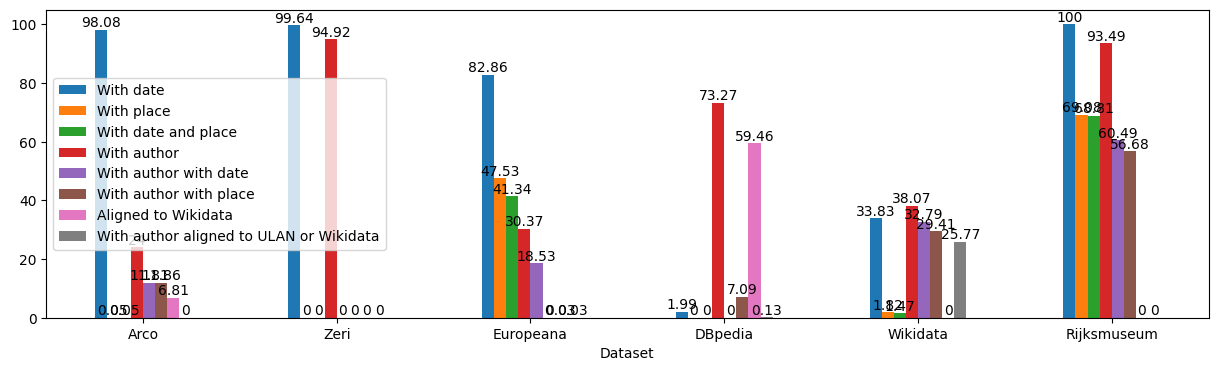

In [49]:
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html

import matplotlib.pyplot as plt
# Create the plot with a specified figure size
fig, ax = plt.subplots(figsize=(15, 4))  # Adjust the width and height as needed
ax = df_prop.plot.bar(rot=0, ax=ax)

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container)

# Show the plot
plt.show()

#ax = df_prop.plot.bar(rot=0)
#for container in ax.containers:
#    ax.bar_label(container)

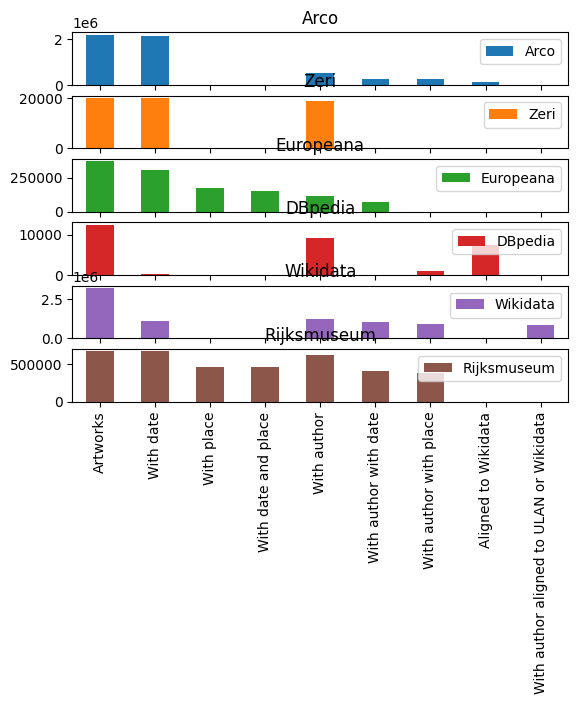

In [47]:
# it turns the dataset names into the names of the columns, so that the subplots for each dataset can be created
df2 = df_main.set_index('Dataset').T
df2

axes = df2.plot.bar(subplots=True
)
axes[0].legend()  